In [32]:
%matplotlib inline
%config InlineBackkend.figure_formats = ["png"]

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

Einlesen der Dateien

In [2]:
df_eval = pd.read_csv("data\otv_data\Saarbruecken_OTCamera04_FR20_2022-10-17_13-15-00_events.csv") 
df_gt = pd.read_csv("data\gt_data\Saarbruecken_OTCamera04_FR20_2022-10-17_13-15-00.csv")

Funktionen:

In [3]:
#equivalenz Tabelle
eq_tb = {
    "Person": "person",
    "Pkw ohne Anhänger": "car",
    "Pkw mit Anhänger": "car",
    "Motorisierte Zweiräder": "motorcycle",
    "Lieferwagen ohne Anhänger": "car",
    "Lieferwagen mit Anhänger": "car",
    "Lkw ohne Anhänger": "truck",
    "Lkw mit Anhänger": "truck",
    "Bus": "bus",
    "Fahrrad ohne Anhänger": "bicycle",
    "Fahrrad mit Anhänger": "bicycle",
    "Lastenrad": "bicycle"
}

In [19]:
def sort_time(df, col = "DateTime"):
      """Sortiert zeile nach der Zeit"""
      df[col] = pd.to_datetime(df[col])
      filtered = df.sort_values(by=col)
      return filtered

def get_df_range(df, t_min, t_max, col = "DateTime" ):
      """Filtert df nach einem tmin und tmax Wert """
      filtered = df[(df[col] >= t_min) & (df[col] < t_max)]
      return filtered

def array_similar(array1, array2):
      """überprüft ob 2 array die gleichen strings enthält"""
      if not len(array1) == len(array2):
            raise ValueError("Arrays dont have the same dimesion!")
      for word in array1:
            if word in array2:
                  next
            else:
                  raise ValueError("Arrays dont contain the same strings")
                  break
      return True
            
def get_gates(df1, df2, col = "SectionID"):
      """überprüft ob spalte identische Gates  haben"""
      df1 = df1[col].unique()
      df2 = df2[col].unique()
      if (array_similar(df1, df2)):
            return df1
      else:
            raise ValueError("Tabllen haben unterschiedliche Gates")

def get_value_counts(df, sections, section_index , value = "Class", section_name = "SectionID"):
      """holt value_counts aus df mit array sections nach index raus"""
      return df.loc[df[section_name] == sections[section_index], [value]].value_counts()

In [5]:
#gate import, bei fehler falsche daten
gates = get_gates(df_eval, df_gt)

In [6]:
#nicht mehrfach ausführen!
df_gt["Class"] = df_gt["Class"].map(eq_tb)

In [7]:
#Sortieren nach Zeit
df_eval = sort_time(df_eval)
df_gt = sort_time(df_gt)

In [11]:
t_min = pd.to_datetime("2022-10-17 13:15:00")
t_max = pd.to_datetime("2022-10-17 13:20:00")#liegt nicht mehr im Berreich

df_11 = get_df_range(df_eval, t_min, t_max)
df_12 = get_df_range(df_gt, t_min, t_max)

In [149]:
t_start = pd.to_datetime("2022-10-17 13:15:00")
t_start.strftime("%H_%M_%S")

'13_15_00'

Für alle Gates schleife:

In [154]:
t_start = pd.to_datetime("2022-10-17 13:15:00")
t_end = pd.to_datetime("2022-10-17 13:30:00")

def loop_gates(t_start, t_end, gates):
    """exportiert für gegebenen Zeitraum und alle gates als csv"""
    for gate_index in enumerate(gates):
        index = gate_index[0]
        df1 = get_df_range(df_gt,t_start,t_end) #Spalten nach Zeitgrenzen
        df2 = get_df_range(df_eval, t_start, t_end)
        df1 = get_value_counts(df1, gates, index) #Spaltenwerte für Fz typen
        df2 = get_value_counts(df2, gates, index)
        if index == 0:
            df_merged = pd.concat([df1, df2], axis=1)
            df_merged = df_merged.rename( columns={0: "gt_" + gate_index[1], 1:  "eval_" + gate_index[1] } )
        else:
            df_merged = pd.concat([df_merged, df1, df2], axis=1)
            df_merged = df_merged.rename( columns={0: "gt_" + gate_index[1], 1: "eval_" + gate_index[1] } )
    filestring = t_start.strftime("%H_%M_%S") + "-" + str(t_end.strftime("%H_%M_%S")) + ".csv"
    df_merged.to_csv( filestring, sep= ";") 

#df_export = pd.DataFrame({df1, df2})

#df_gt[(df_gt["DateTime"] >= t_start) & (df_gt["DateTime"] < t_end)]

In [157]:
t_start = pd.to_datetime("2022-10-17 13:15:00")
t_end = pd.to_datetime("2022-10-17 13:20:00")
loop_gates(t_start, t_end, gates)

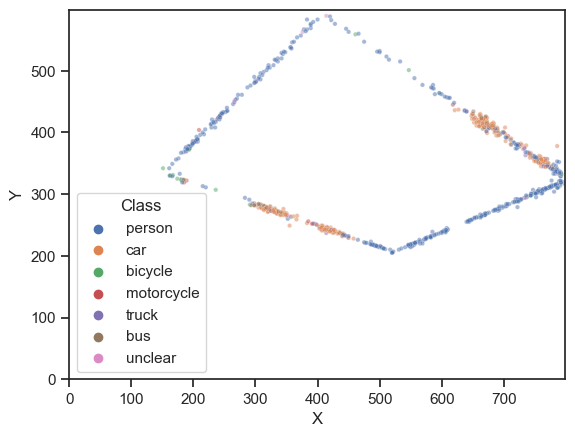

In [65]:
sns.set_style("ticks")
ax = sns.scatterplot(data = df_eval, x = "X", y = "Y", alpha = 0.5, s = 10, hue = "Class")
ax.set_xlim(0, 799),
ax.set_ylim(0, 599)
plt.savefig("test.png", dpi = 300)

In [13]:
#Intervall einstellungen
t_min = df_gt["DateTime"].min()
t_max = df_gt["DateTime"].max() + pd.Timedelta(seconds=1)
t_int = pd.Timedelta(minutes=5, seconds=0) #evaluierungsinterval !

t_end = t_min
while t_end <=(t_max - t_int):
    t_start = t_end
    t_end = t_start + t_int
    print(t_end)
    

2022-10-17 13:20:00
2022-10-17 13:25:00
2022-10-17 13:30:00


In [38]:
gates[0]

'Haltelinie'